In [682]:
# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Data Dictionary
- CustomerID: A unique identifier assigned to each telecom customer, enabling tracking and identification of individual customers. 
- Gender: The gender of the customer, which can be categorized as male, or female. This information helps in analyzing gender-based trends in customer churn. 
- SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen or not. This attribute helps in understanding if there are any specific churn patterns among senior customers. 
- Partner: Indicates whether the customer has a partner or not. This attribute helps in evaluating the impact of having a partner on churn behavior. 
- Dependents: Indicates whether the customer has dependents or not. This attribute helps in assessing the influence of having dependents on customer churn. 
- Tenure: The duration for which the customer has been subscribed to the telecom service. It represents the loyalty or longevity of the customer’s relationship with the company and is a significant predictor of churn. 
- PhoneService: Indicates whether the customer has a phone service or not. This attribute helps in understanding the impact of phone service on churn.
- MultipleLines: Indicates whether the customer has multiple lines or not. This attribute helps in analyzing the effect of having multiple lines on customer churn. 
- InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service. It helps in evaluating the relationship between internet service and churn. 
- OnlineSecurity: Indicates whether the customer has online security services or not. This attribute helps in analyzing the impact of online security on customer churn. 
- OnlineBackup: Indicates whether the customer has online backup services or not. This attribute helps in evaluating the impact of online backup on churn behavior. 
- DeviceProtection: Indicates whether the customer has device protection services or not. This attribute helps in understanding the influence of device protection on churn. 
- TechSupport: Indicates whether the customer has technical support services or not. This attribute helps in assessing the impact of tech support on churn behavior. 
- StreamingTV: Indicates whether the customer has streaming TV services or not. This attribute helps in evaluating the impact of streaming TV on customer churn.
- StreamingMovies: Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence of streaming movies on churn behavior. 
- Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial factor in predicting churn as different contract lengths may have varying impacts on customer loyalty. 
- PaperlessBilling: Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of paperless billing on customer churn. 
- PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards. This attribute helps in evaluating the impact of payment methods on churn. 
- MonthlyCharges: The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly charges and churn behavior. 
- TotalCharges: The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the customer and may have an impact on churn. 
- Churn: The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to predict in telecom customer churn analysis.

In [683]:
# Load dataset - From seaborn
df = pd.read_csv("Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [684]:
df.shape

(7043, 21)

In [685]:
# Data verification - Data type,number of features and rows and missing data, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [686]:
# Convert 'TotalCharges' column to numeric, setting invalid parsing to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [687]:
# Convert 'Total' column to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [688]:
# Data verification - Data type,number of features and rows and missing data, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [689]:
# Statistical analysis of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<Axes: >

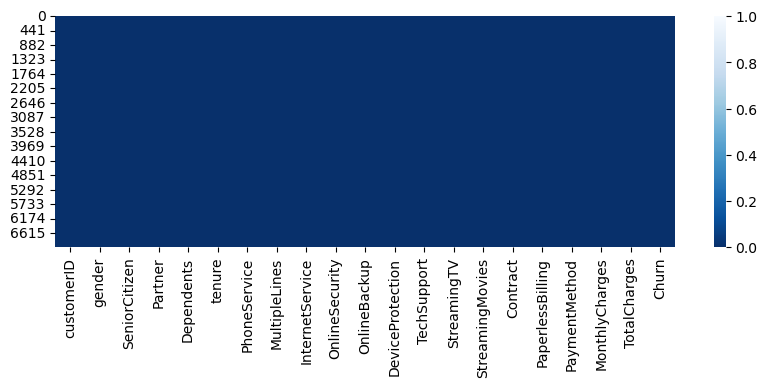

In [690]:
# check for missing values
print (df.isnull().sum())

# visualizing the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

In [691]:
# Display where the missing data exist in the data
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [692]:
# Drop the missing data, seeing as they are only 11 which is less than 1% of the data set and wont affect our reading

df.dropna(inplace=True)

In [693]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [694]:
# Dimensionality of the data - The number of rows and columns
df.shape

(7032, 21)

## Exploratory Data Analysis

### Univariate Analysis

In [695]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

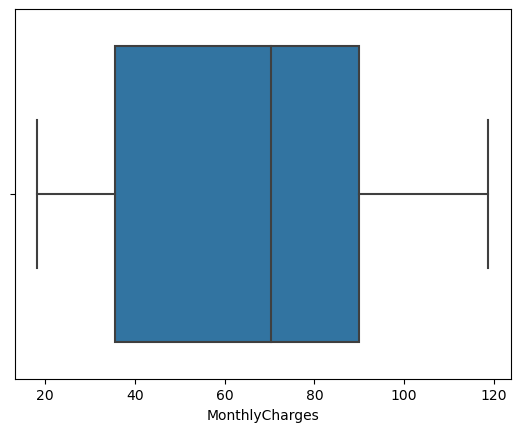

In [696]:
# Check for outliers
sns.boxplot(x=df["MonthlyCharges"]);

### From this observation, Monthly Charges has no outlier

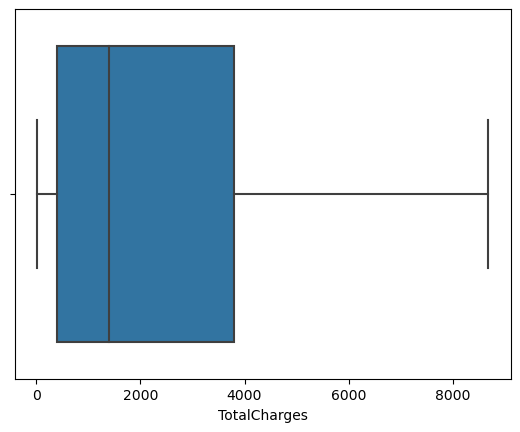

In [697]:
# Check for outliers
sns.boxplot(x=df["TotalCharges"]);

### From this observation, Total Charges has no outlier

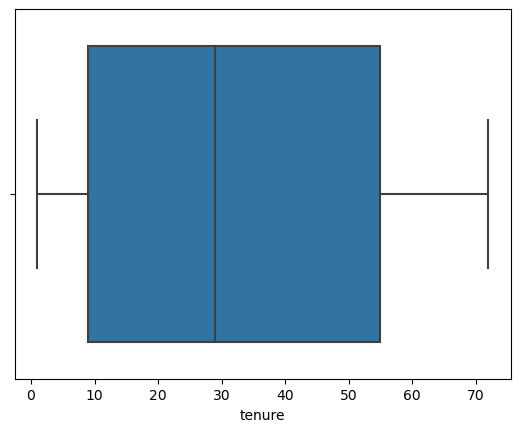

In [698]:
# Check for outliers
sns.boxplot(x=df["tenure"]);

### From this observation, Tenure has no outlier

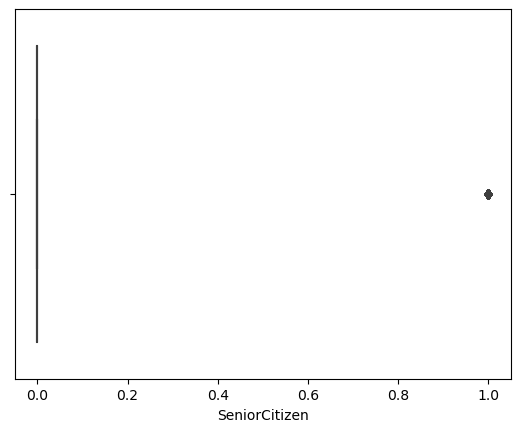

In [699]:
# Check for outliers
sns.boxplot(x=df["SeniorCitizen"]);

### From this observation, there is 1 outlier in the senior citizen (age group) category

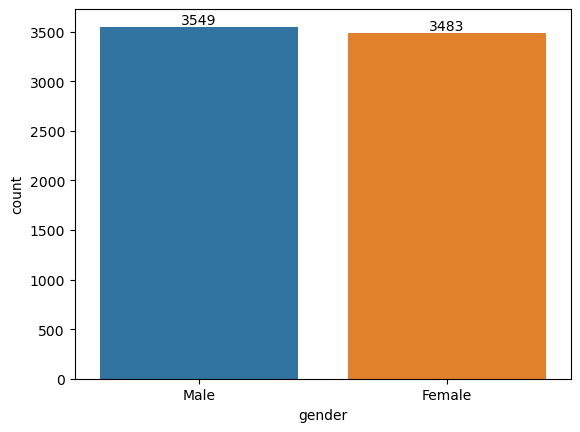

In [700]:
# Gender - Gender count
ax = sns.countplot(x=df["gender"], order=df["gender"].value_counts(ascending=False).index)
values = df["gender"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### According to the visualization, there is a slightly higher number of male customers than female customers at CONNECTTEL.

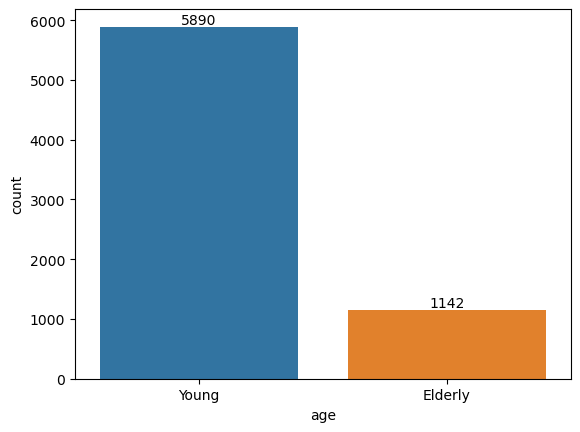

In [701]:
# SeniorCitizen- count of young and elderly customers
def age(SeniorCitizen):
    if SeniorCitizen == 1:
        return "Elderly"
    else:
        return "Young"
    
df ['age'] = df['SeniorCitizen'].apply(age)
ax = sns.countplot(x=df["age"], order=df["age"].value_counts(ascending=False).index)
values = df["age"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Based on the visualization, it appears that CONNECTTEL has a relatively younger customer demographic.

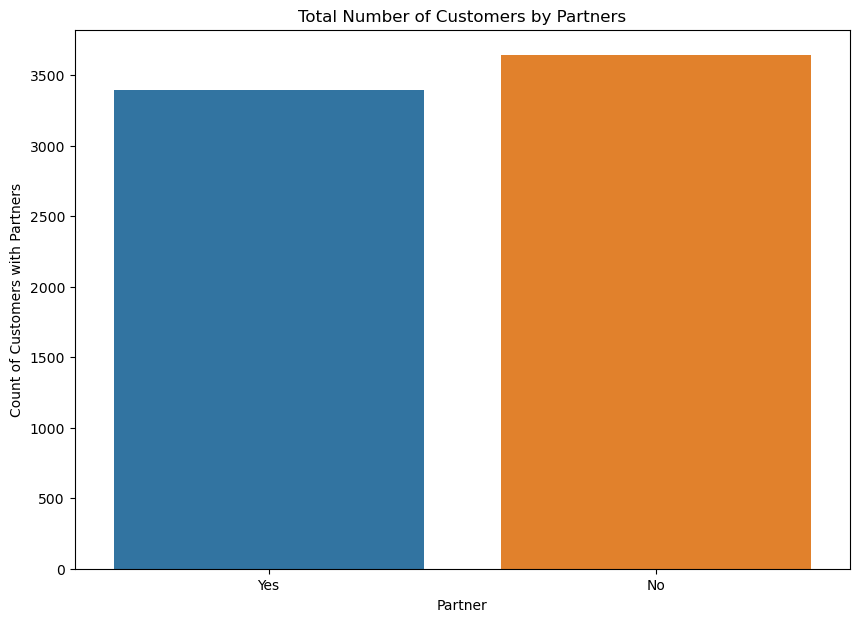

In [702]:
# investigating if customers have partners
plt.figure(figsize = (10,7))
sns.countplot(x='Partner', data=df)
plt.xlabel('Partner')
plt.ylabel('Count of Customers with Partners')
plt.title('Total Number of Customers by Partners');

### Based on the visualization, there is a higher number of users who have partners compared to those who are single.

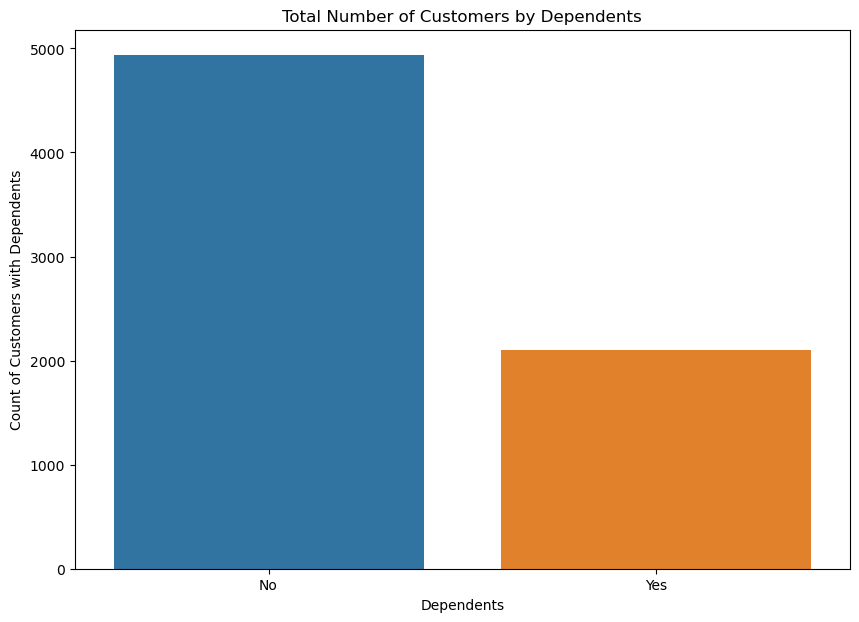

In [703]:
# investigating if customers have dependents
plt.figure(figsize = (10,7))
sns.countplot(x='Dependents', data=df)
plt.xlabel('Dependents')
plt.ylabel('Count of Customers with Dependents')
plt.title('Total Number of Customers by Dependents');

### The visualization indicates a higher number of users who have dependents.

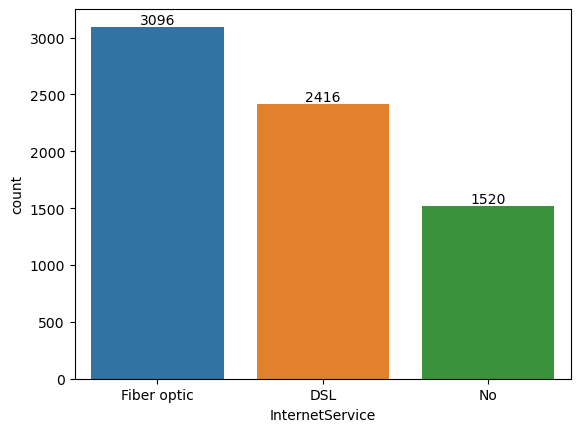

In [704]:
# Internet service- Customers by type of internet service
ax = sns.countplot(x=df["InternetService"], order=df["InternetService"].value_counts(ascending=False).index)
values = df["InternetService"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### There are more customers with fibre optic connections than those with DSL or no internet service.

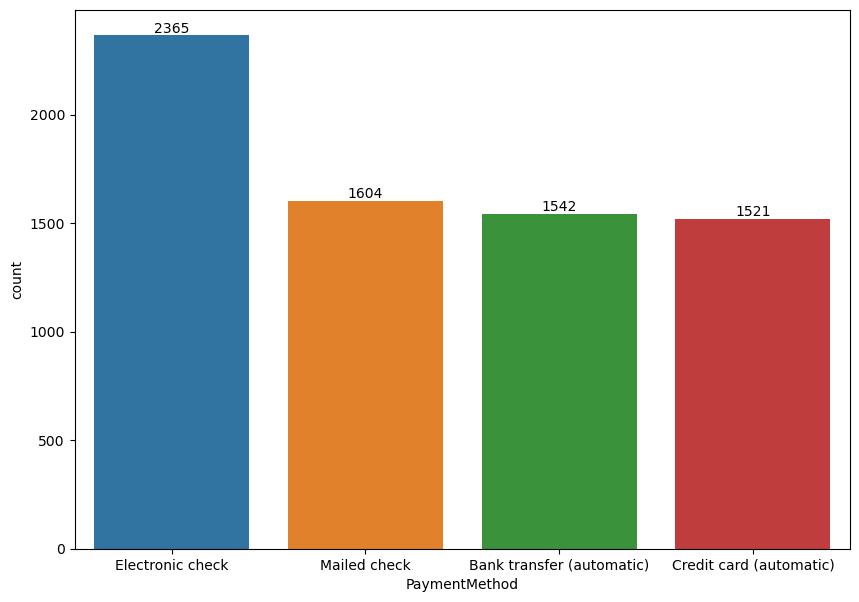

In [705]:
# Payment Method- Customers based on Payment Method
plt.figure(figsize = (10,7))
ax = sns.countplot(x=df["PaymentMethod"], order=df["PaymentMethod"].value_counts(ascending=False).index)
values = df["PaymentMethod"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Based on the visualization, it is evident that the electronic check payment method has the largest user base.

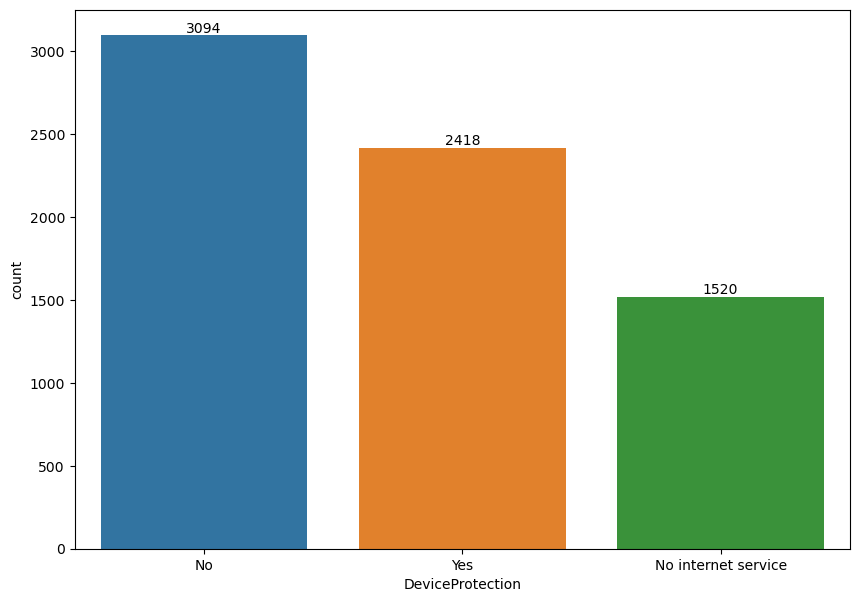

In [706]:
# DeviceProtection- Customers based on Device Protection
plt.figure(figsize = (10,7))
ax = sns.countplot(x=df["DeviceProtection"], order=df["DeviceProtection"].value_counts(ascending=False).index)
values = df["DeviceProtection"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);


### Based on the visualization, a larger number of users do not have phone protection as a service.

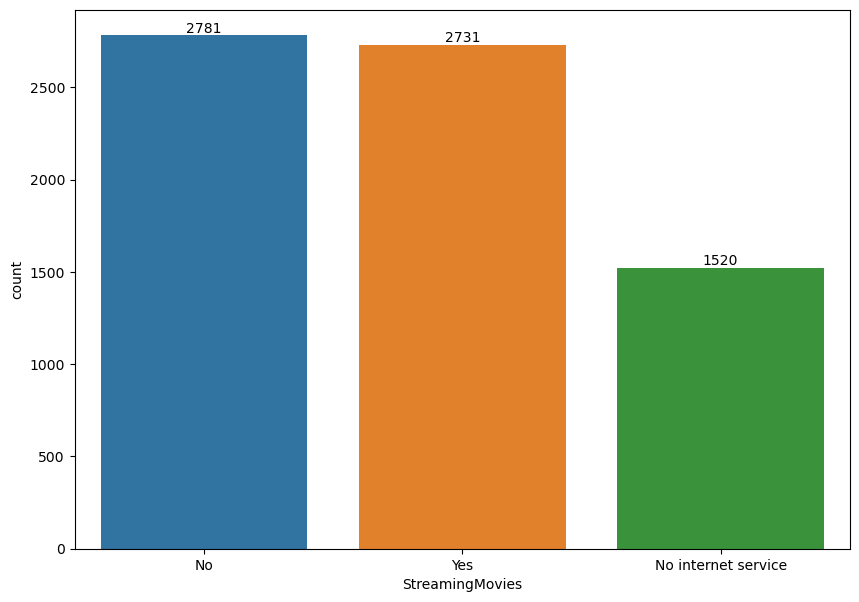

In [707]:
# StreamingMovies- Customers based on StreamingMovies
plt.figure(figsize = (10,7))
ax = sns.countplot(x=df["StreamingMovies"], order=df["StreamingMovies"].value_counts(ascending=False).index)
values = df["StreamingMovies"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);


### The contrast between users who stream movies and those who do not is not substantial.

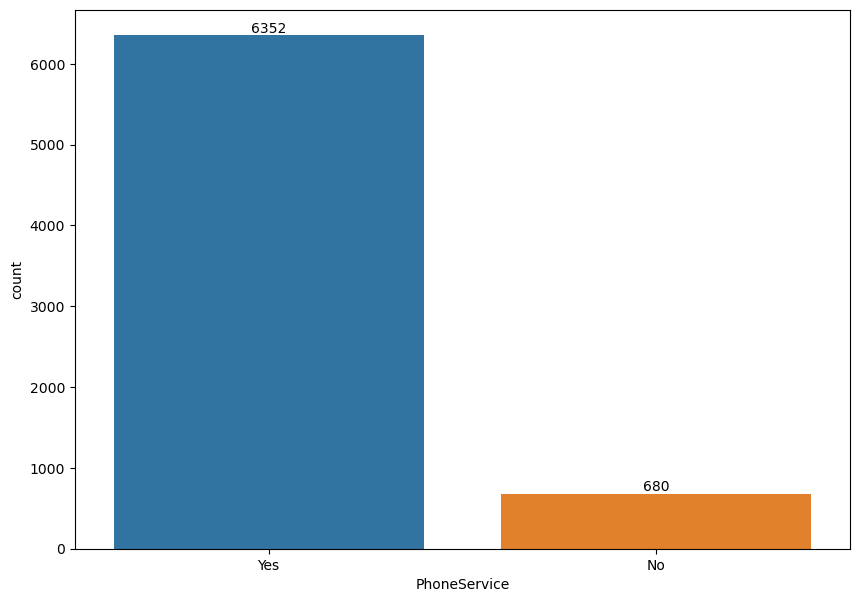

In [708]:
# PhoneService- Customers based on PhoneService
plt.figure(figsize = (10,7))
ax = sns.countplot(x=df["PhoneService"], order=df["PhoneService"].value_counts(ascending=False).index)
values = df["PhoneService"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### The phone service package is used by a significant majority of the users.

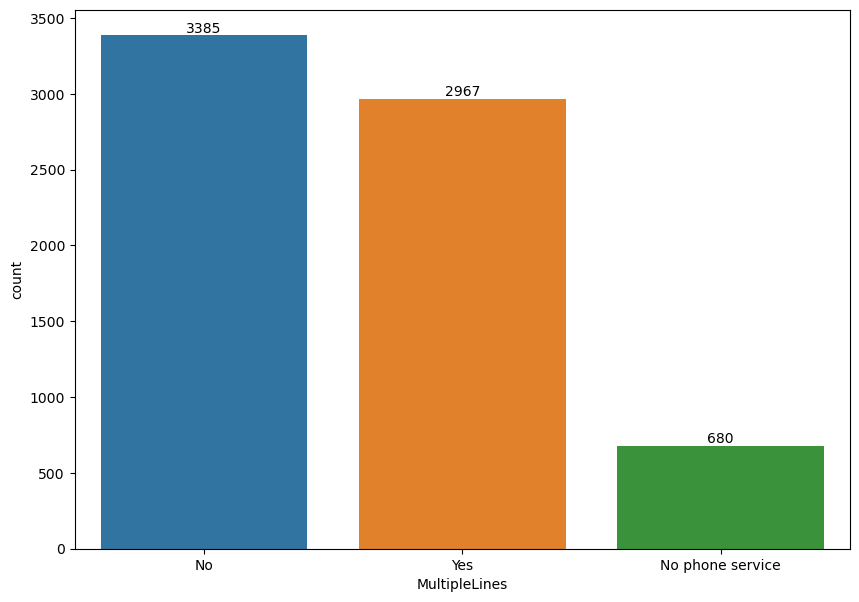

In [709]:
# MultipleLines- Customers based on MultipleLines
plt.figure(figsize = (10,7))
ax = sns.countplot(x=df["MultipleLines"], order=df["MultipleLines"].value_counts(ascending=False).index)
values = df["MultipleLines"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);


### Most users do not have multiple lines.

## Bivariate Analysis

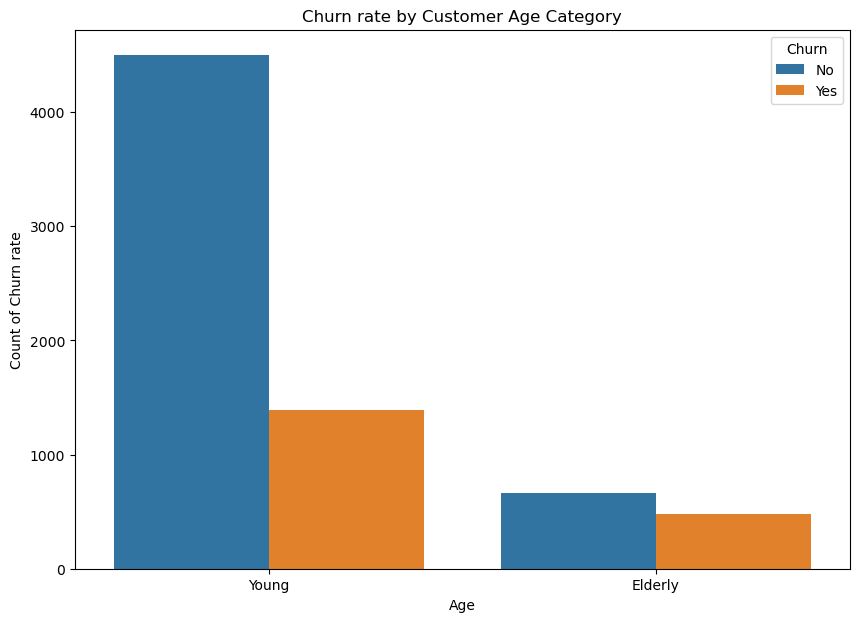

In [710]:
## Age with highest churn rate
def age(SeniorCitizen):
    if SeniorCitizen == 1:
        return "Elderly"
    else:
        return "Young"
    
df ['age'] = df['SeniorCitizen'].apply(age)

# investigating the age of customers
plt.figure(figsize = (10,7))
sns.countplot(x='age', data=df, hue='Churn')
plt.xlabel('Age')
plt.ylabel('Count of Churn rate')
plt.title('Churn rate by Customer Age Category');

### Based on the analysis, it appears that younger customers are more inclined to remain active compared to senior citizens.

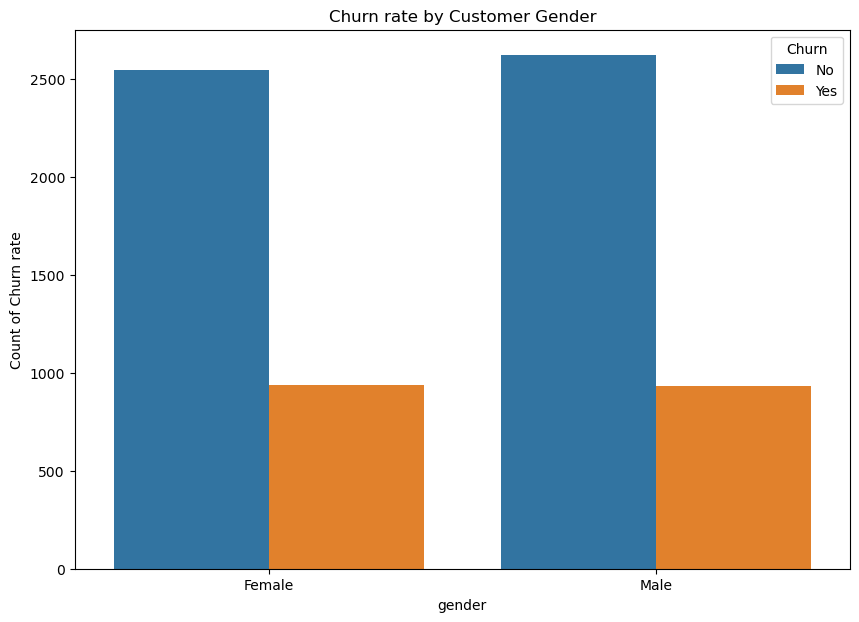

In [711]:
# investigating the gender with highest churn rate
plt.figure(figsize = (10,7))
sns.countplot(x='gender', data=df, hue='Churn')
plt.xlabel('gender')
plt.ylabel('Count of Churn rate')
plt.title('Churn rate by Customer Gender');

### In this analysis, it is evident that there are a higher number of active male users, while the number of female users who churned is greater.

In [712]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'age'],
      dtype='object')

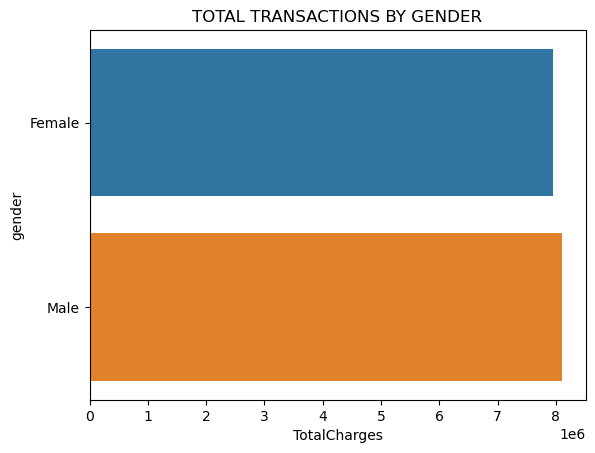

In [713]:
# investigating the gender with highest revenue
gender_tran = df.groupby("gender")["TotalCharges"].sum().reset_index()
sns.barplot(y='gender', data=gender_tran, x='TotalCharges')
plt.title("TOTAL TRANSACTIONS BY GENDER");

### Based on this analysis, it seems that male users contributed to a higher revenue generation.

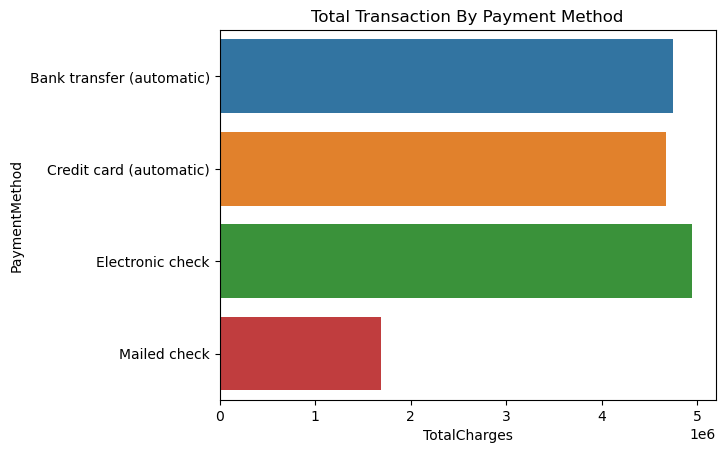

In [714]:
# investigating the payment method with highest revenue
gender_tran = df.groupby("PaymentMethod")["TotalCharges"].sum().reset_index()
sns.barplot(y='PaymentMethod', data=gender_tran, x='TotalCharges')
plt.title("Total Transaction By Payment Method");

### Based on the visualization, it is evident that the electronic check payment method generated the highest revenue

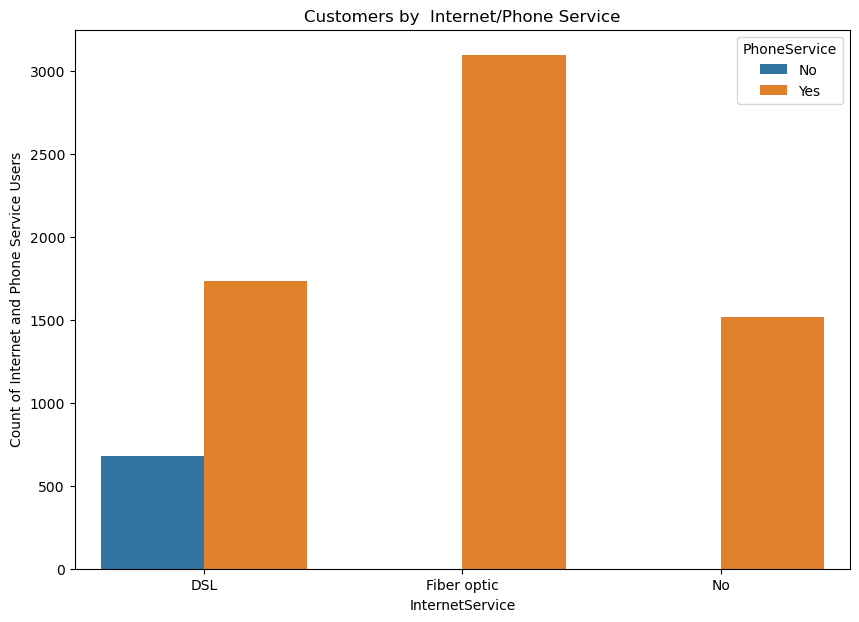

In [715]:
# investigating the users with internet service who have phone service
plt.figure(figsize = (10,7))
sns.countplot(x='InternetService', data=df, hue='PhoneService')
plt.xlabel('InternetService')
plt.ylabel('Count of Internet and Phone Service Users')
plt.title('Customers by  Internet/Phone Service');

### From this observation, it is evident that all fibre optic users have phone services.

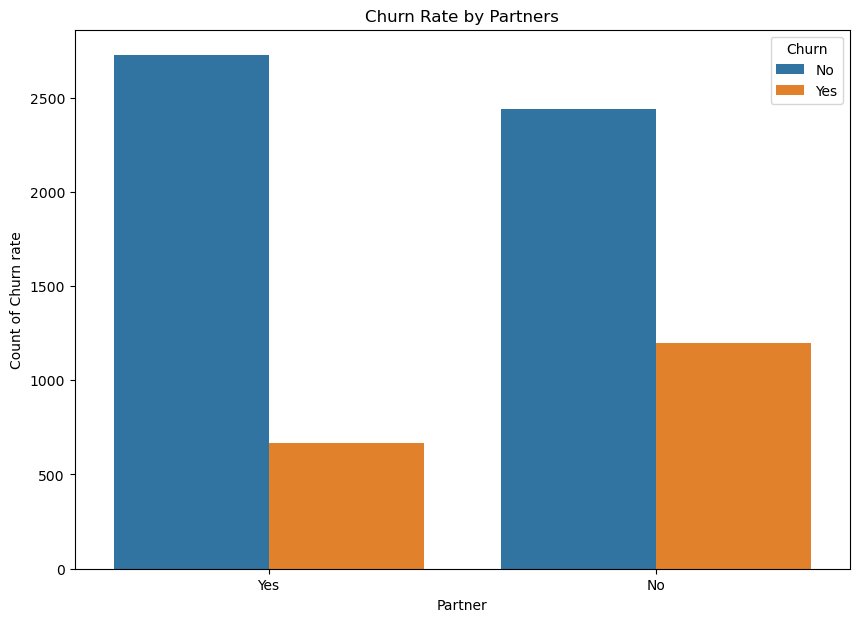

In [716]:
# investigating the partner category churn rate
plt.figure(figsize = (10,7))
sns.countplot(x='Partner', data=df, hue='Churn')
plt.xlabel('Partner')
plt.ylabel('Count of Churn rate')
plt.title('Churn Rate by Partners');

### Users who have partners are more likely to be active, whereas those without partners are more prone to inactivity or expiration.

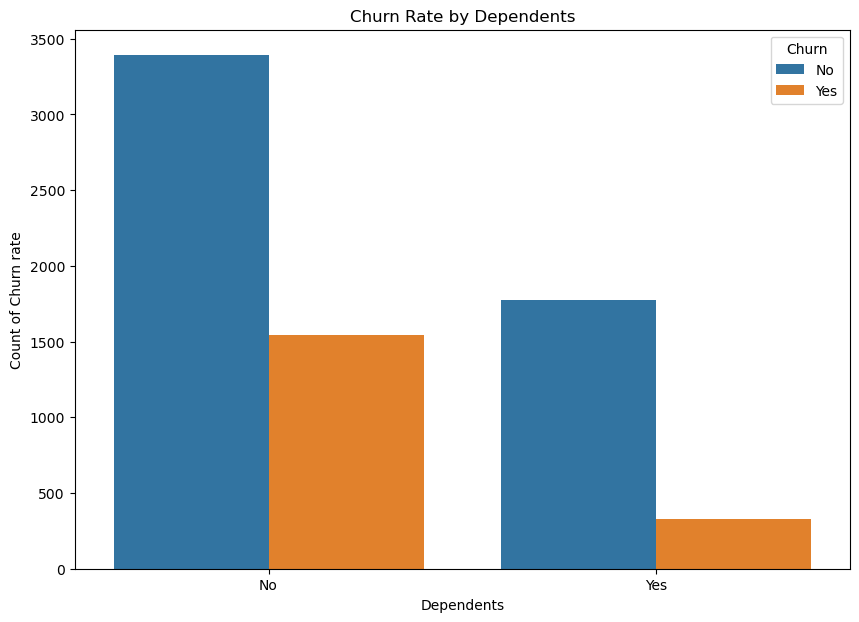

In [717]:
# investigating the dependents category with highest churn rate
plt.figure(figsize = (10,7))
sns.countplot(x='Dependents', data=df, hue='Churn')
plt.xlabel('Dependents')
plt.ylabel('Count of Churn rate')
plt.title('Churn Rate by Dependents');

### Users with dependents tend to expire more

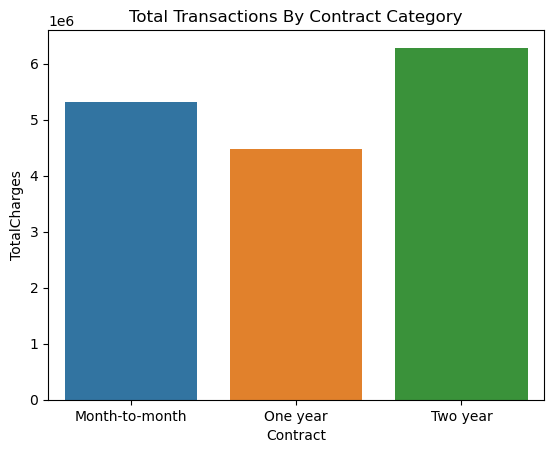

In [718]:
# Investigating the contract category with highest revenue
gender_tran = df.groupby("Contract")["TotalCharges"].sum().reset_index()
sns.barplot(x='Contract', data=gender_tran, y='TotalCharges')
plt.title("Total Transactions By Contract Category");

### Two year contracts generates more revenue

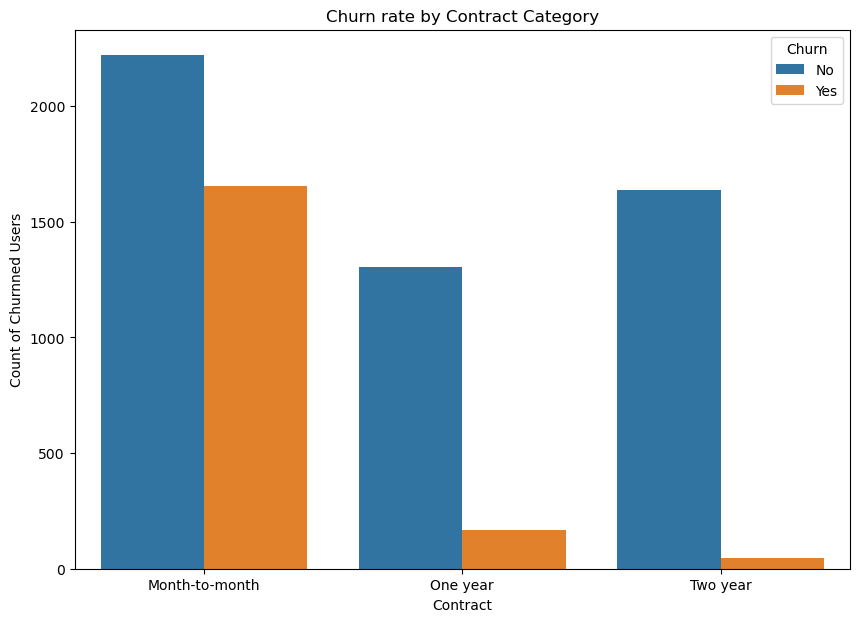

In [719]:
# investigating the contract category with highest churn rate
plt.figure(figsize = (10,7))
sns.countplot(x='Contract', data=df, hue='Churn')
plt.xlabel('Contract')
plt.ylabel('Count of Churnned Users')
plt.title('Churn rate by Contract Category');

### Month to month contract category has the highest churn rate

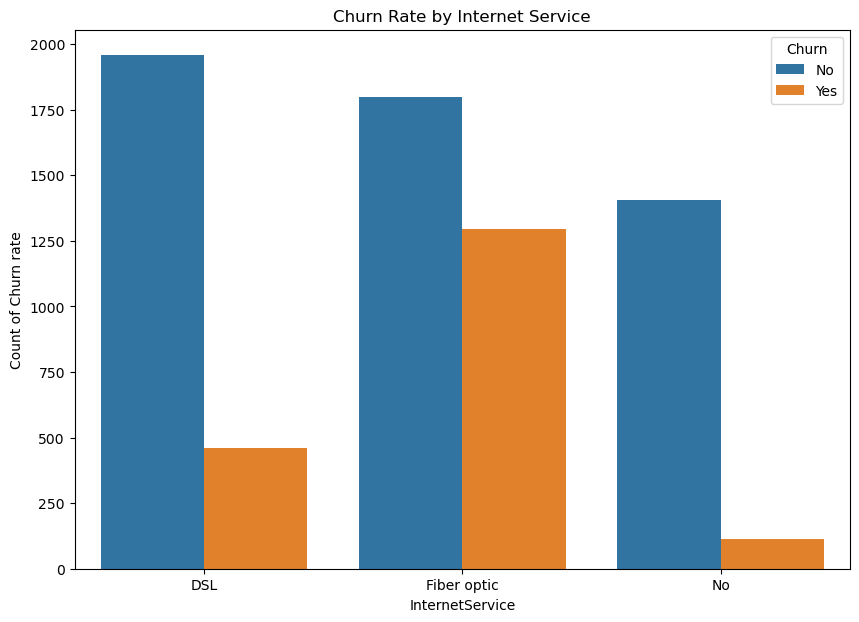

In [720]:
# investigating the churn rate by internet service type
plt.figure(figsize = (10,7))
sns.countplot(x='InternetService', data=df, hue='Churn')
plt.xlabel('InternetService')
plt.ylabel('Count of Churn rate')
plt.title('Churn Rate by Internet Service');

### The fibre optic users are more likely to churn as it has the highest churn rate

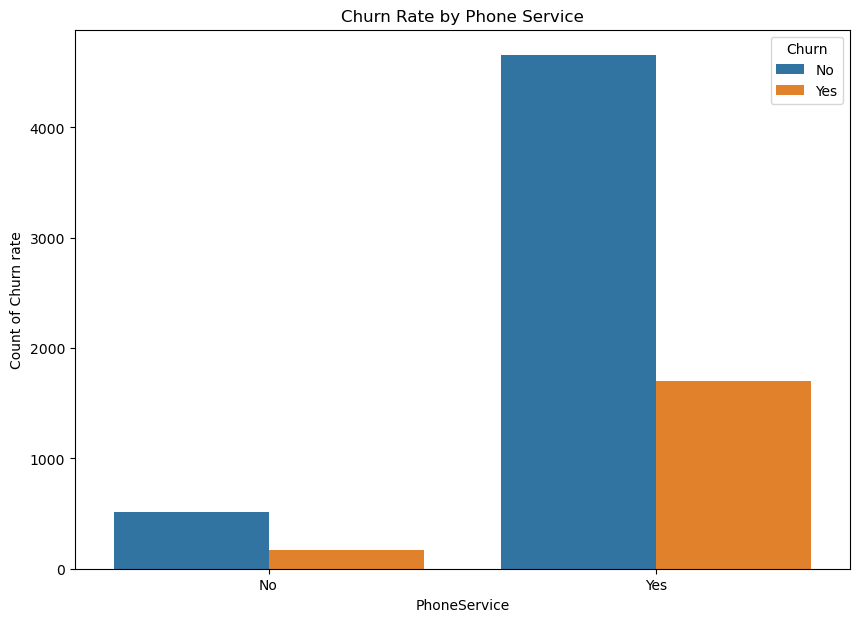

In [721]:
# investigating the phone service category with highest churn rate
plt.figure(figsize = (10,7))
sns.countplot(x='PhoneService', data=df, hue='Churn')
plt.xlabel('PhoneService')
plt.ylabel('Count of Churn rate')
plt.title('Churn Rate by Phone Service');

### The users with phone service have a higher number of users (both churnned and active)

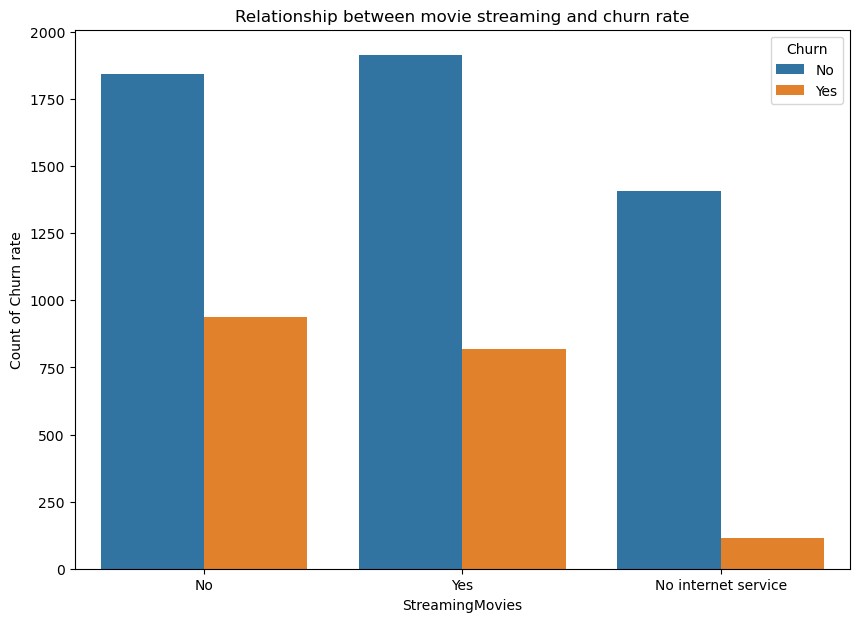

In [722]:
# Investigating the relationship between movie streaming and churn rate
plt.figure(figsize = (10,7))
sns.countplot(x='StreamingMovies', data=df, hue='Churn')
plt.xlabel('StreamingMovies')
plt.ylabel('Count of Churn rate')
plt.title('Relationship between movie streaming and churn rate');

### From the visualization, we can see that more users tend to stream movies while those without streaming service tend to expire more

In [723]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Young
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Young
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Young
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Young
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Young


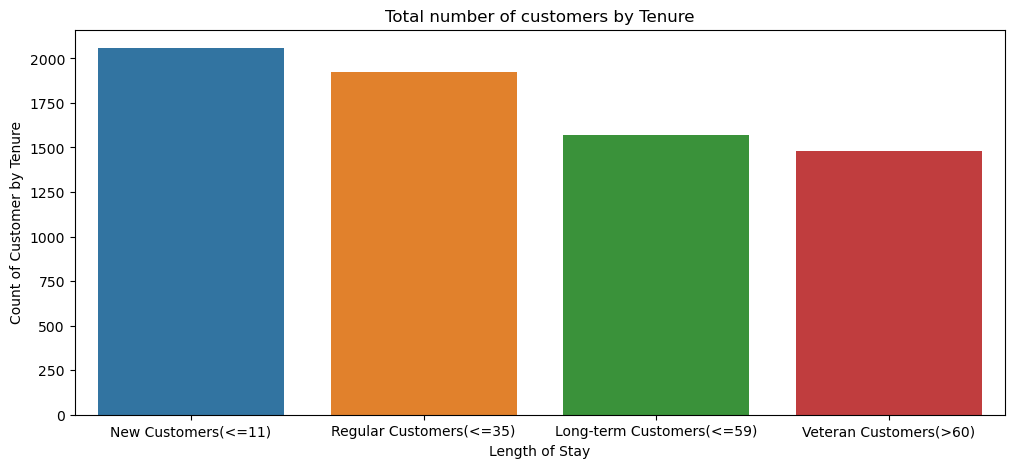

In [724]:
# Duration of stay/tenure
def cust_category(tenure):
    if tenure <= 11:
        return "New Customers(<=11)"
    elif tenure <= 35:
        return "Regular Customers(<=35)"
    elif tenure <= 59:
        return "Long-term Customers(<=59)"
    else:
        return "Veteran Customers(>60)"
    
df['cust_category'] = df['tenure'].apply(cust_category)

# Investigating the tenure of customers
plt.figure(figsize = (12,5))
sns.countplot(x='cust_category', data=df)
plt.xlabel('Length of Stay')
plt.ylabel('Count of Customer by Tenure')
plt.title('Total number of customers by Tenure');


### Based on this observation, there are a higher number of new users compared to long-term and veteran customers.

In [725]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,cust_category
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Young,New Customers(<=11)
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Young,Regular Customers(<=35)
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Young,New Customers(<=11)
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Young,Long-term Customers(<=59)
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Young,New Customers(<=11)


In [726]:
## Converting Churn from categorical/object data type to numerical data
def churn_num(Churn):
    if Churn == "Yes":
        return 1
    else:
        return 0
    
df ['churn_num'] = df['Churn'].apply(churn_num)

In [727]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,cust_category,churn_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Young,New Customers(<=11),0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,Young,Regular Customers(<=35),0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Young,New Customers(<=11),1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Young,Long-term Customers(<=59),0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Young,New Customers(<=11),1


### Multivariate Analysis

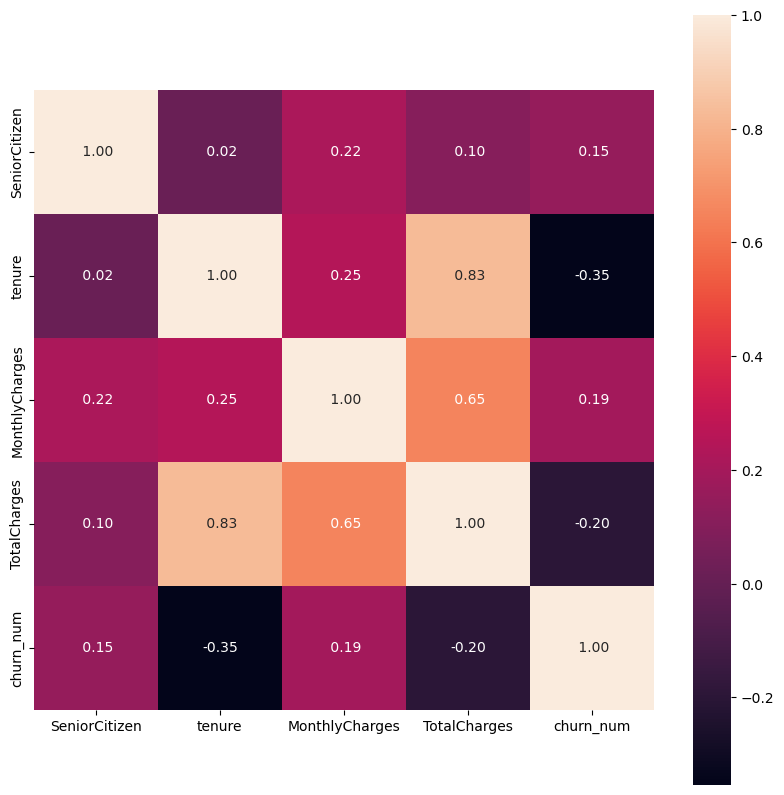

In [728]:
# Correlation between churn rate and other variables in the data set

plt.figure(figsize=(10, 10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt=' .2f', annot_kws={'size': 10})

### From the analysis, there is a strong relationship  between total charges (revenue) generated and length of stay (tenure) while the relationship between total charges and tenure with churn rate have a negative correlation.


### Feature Engineering/Data Pre-Processing

In [729]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,age,cust_category,churn_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Young,New Customers(<=11),0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,Young,Regular Customers(<=35),0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Young,New Customers(<=11),1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Young,Long-term Customers(<=59),0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Young,New Customers(<=11),1


In [730]:
# Creating a copy of the data (exclude churn, age alongside other columns that were created)
df1 = df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

label = df[['churn_num']]

In [731]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [732]:
label.head()

,churn_num
0,0
1,0
2,1
3,0
4,1


In [733]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [734]:
# One-hot encoding is a common technique used to convert categorical variables into binary representations so that they can be used in machine learning algorithms.
df1 = pd.get_dummies(df1,columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)
df1.head(2)

,customerID,SeniorCitizen,tenure,StreamingMovies,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,No,29.85,29.85,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,No,56.95,1889.50,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [735]:
df1 = pd.get_dummies(df1,columns=['StreamingMovies'],drop_first=True)
df1.head(2)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [736]:
df1.dtypes

customerID                                object
SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes     

In [737]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   gender_Male                            7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

In [738]:
# Normalize the data and scale everything to be between 0 and 1
scaler = MinMaxScaler()

df1["Scaled_tenure"] = scaler.fit_transform(df1['tenure'].values.reshape(-1, 1))
df1["Scaled_MonthlyCharges"] = scaler.fit_transform(df1[['MonthlyCharges']].values.reshape(-1, 1))
df1["Scaled_TotalCharges"] = scaler.fit_transform(df1[['TotalCharges']].values.reshape(-1, 1))

df1.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)
                                                        
df1.head                                                       

                                

<bound method NDFrame.head of       customerID  SeniorCitizen  gender_Male  Partner_Yes  Dependents_Yes  \
0     7590-VHVEG              0            0            1               0   
1     5575-GNVDE              0            1            0               0   
2     3668-QPYBK              0            1            0               0   
3     7795-CFOCW              0            1            0               0   
4     9237-HQITU              0            0            0               0   
...          ...            ...          ...          ...             ...   
7038  6840-RESVB              0            1            1               1   
7039  2234-XADUH              0            0            1               1   
7040  4801-JZAZL              0            0            1               1   
7041  8361-LTMKD              1            1            1               0   
7042  3186-AJIEK              0            1            0               0   

      PhoneService_Yes  MultipleLines_No phon

In [739]:
df1.drop(['customerID'], axis=1, inplace=True)
                                                        
df1.head

<bound method NDFrame.head of       SeniorCitizen  gender_Male  Partner_Yes  Dependents_Yes  \
0                 0            0            1               0   
1                 0            1            0               0   
2                 0            1            0               0   
3                 0            1            0               0   
4                 0            0            0               0   
...             ...          ...          ...             ...   
7038              0            1            1               1   
7039              0            0            1               1   
7040              0            0            1               1   
7041              1            1            1               0   
7042              0            1            0               0   

      PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  \
0                    0                               1                  0   
1                    1             

## Machine Learning

In [740]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [741]:
X_train.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes,Scaled_tenure,Scaled_MonthlyCharges,Scaled_TotalCharges
6030,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0.591549,0.306468,0.237411
3410,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0.028169,0.349751,0.019605
5483,0,0,1,0,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0.760563,0.592040,0.512272
5524,0,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0.619718,0.362189,0.292511
6337,0,0,1,1,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0.760563,0.822388,0.626564


In [742]:
y_train.head()

,churn_num
6030,1
3410,1
5483,1
5524,0
6337,0


In [743]:
X_test.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No internet service,StreamingMovies_Yes,Scaled_tenure,Scaled_MonthlyCharges,Scaled_TotalCharges
2481,1,1,1,0,1,0,1,0,1,1,...,1,0,0,0,0,1,0,0.845070,0.067164,0.171123
6784,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,1,0,0.253521,0.064179,0.051587
6125,0,1,1,0,1,0,1,1,0,0,...,0,1,1,0,0,0,1,0.169014,0.835821,0.154650
3052,0,1,1,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0.507042,0.366169,0.232166
4099,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.070423,0.111443,0.016461


In [744]:
y_test.head()

,churn_num
2481,0
6784,0
6125,1
3052,0
4099,0


In [745]:
df1.head

<bound method NDFrame.head of       SeniorCitizen  gender_Male  Partner_Yes  Dependents_Yes  \
0                 0            0            1               0   
1                 0            1            0               0   
2                 0            1            0               0   
3                 0            1            0               0   
4                 0            0            0               0   
...             ...          ...          ...             ...   
7038              0            1            1               1   
7039              0            0            1               1   
7040              0            0            1               1   
7041              1            1            1               0   
7042              0            1            0               0   

      PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  \
0                    0                               1                  0   
1                    1             

In [746]:
# Model Building

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.7882018479033405
Precision: 0.6233766233766234
Recall: 0.5133689839572193
F1-score: 0.5630498533724341
AUC-ROC: 0.7005373477385323


### Based on the results of the trained Logistic Regression model:

1. Accuracy: The model achieved an accuracy of approximately 78.8%. This metric indicates the proportion of correct predictions made by the model on the test data. An accuracy of 78.8% suggests that the model is performing reasonably well in predicting the target variable.

2. Precision: The precision of the model is around 62.3%. Precision measures the ability of the model to correctly identify positive samples (in this case, the positive class) out of all the samples it predicted as positive. A precision of 62.3% means that when the model predicts a positive class, it is correct around 62.3% of the time.

3. Recall: The recall, also known as sensitivity or true positive rate, is approximately 51.3%. Recall measures the ability of the model to identify all positive samples correctly out of all the actual positive samples. A recall of 51.3% suggests that the model is correctly identifying only about 51.3% of the actual positive samples.

4. F1-score: The F1-score is approximately 56.3%. The F1-score is the harmonic mean of precision and recall and is used to balance both metrics. It considers both false positives and false negatives, making it a good metric when there is an imbalance between classes. A higher F1-score indicates a better trade-off between precision and recall.

5. AUC-ROC: The Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC) is around 70.1%. The ROC curve plots the true positive rate against the false positive rate at different probability thresholds. The AUC-ROC provides an overall measure of the model's ability to distinguish between the positive and negative classes. A higher AUC-ROC value indicates better discrimination between the classes.

Overall, the trained Logistic Regression model shows decent performance with reasonably good accuracy and F1-score. However, there is room for improvement, especially in increasing recall, which suggests that the model is not capturing all positive samples effectively.

In [747]:
# Model Building

# Naive Bayes

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred))
print("Recall:", recall_score(y_test, nb_pred))
print("F1-score:", f1_score(y_test, nb_pred))
print("AUC-ROC:", roc_auc_score(y_test, nb_pred))


Naive Bayes
Accuracy: 0.6574271499644634
Precision: 0.4287598944591029
Recall: 0.8689839572192514
F1-score: 0.5742049469964665
AUC-ROC: 0.7249082419203712


### Based on the results of the trained Naive Bayes model:

1. Accuracy: The accuracy of the model is approximately 65.74%, which means that about 65.74% of the predictions made by the model are correct. However, accuracy alone may not be the best metric to evaluate the model's performance, especially if the dataset is imbalanced.

2. Precision: The precision of the model is around 42.88%. Precision represents the proportion of true positive predictions out of all positive predictions. In this case, it means that when the model predicts a positive outcome, it is correct around 42.88% of the time.

3. Recall: The recall (also known as sensitivity or true positive rate) is approximately 86.90%. Recall represents the proportion of true positive predictions out of all actual positive instances. In this case, it means that the model correctly identifies around 86.90% of the actual positive cases.

4. F1-score: The F1-score is around 57.42%. The F1-score is the harmonic mean of precision and recall and is used when there is an uneven class distribution. It provides a balance between precision and recall.

5. AUC-ROC: The Area Under the Receiver Operating Characteristic (ROC) Curve is approximately 72.49%. The ROC curve shows the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) at different classification thresholds. A higher AUC-ROC score indicates better model performance in distinguishing between the positive and negative classes.

Overall, the model seems to have a relatively high recall, meaning it can identify a significant portion of positive cases correctly. However, the precision is relatively low, indicating that there are a considerable number of false positive predictions. The F1-score provides a balanced view of the model's performance, considering both precision and recall.

In [748]:
# Create and train the SGDClassifier model
sgd_clf = SGDClassifier(loss='log', random_state=42)  
sgd_clf.fit(X_train, y_train)

sgd_pred = sgd_clf.predict(X_test)

print("SGD Classifier")
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print("Precision:", precision_score(y_test, sgd_pred))
print("Recall:", recall_score(y_test, sgd_pred))
print("F1-score:", f1_score(y_test, sgd_pred))
print("AUC-ROC:", roc_auc_score(y_test, sgd_pred))


SGD Classifier
Accuracy: 0.7889125799573561
Precision: 0.6624472573839663
Recall: 0.4197860962566845
F1-score: 0.513911620294599
AUC-ROC: 0.6711708796869096


### Based on the results of the trained SGD Classifier model:

1. Accuracy: 0.7889
   - The accuracy measures the proportion of correctly classified instances out of the total instances in the test set. In this case, the model achieved an accuracy of approximately 78.89%, meaning it correctly predicted the class for about 78.89% of the test data.

2. Precision: 0.6624
   - Precision is the ratio of true positive predictions to the total predicted positive instances. It indicates how many of the predicted positive instances are actually true positives. In this case, the model achieved a precision of approximately 66.24%, suggesting that about 66.24% of the instances predicted as positive were true positives.

3. Recall: 0.4198
   - Recall (also known as sensitivity or true positive rate) is the ratio of true positive predictions to the total actual positive instances. It measures the ability of the model to correctly identify positive instances. In this case, the model achieved a recall of approximately 41.98%, indicating that it correctly identified about 41.98% of the actual positive instances.

4. F1-score: 0.5139
   - The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance on both precision and recall. It takes both false positives and false negatives into account. In this case, the model achieved an F1-score of approximately 51.39%, which is a balance between precision and recall.

5. AUC-ROC: 0.6712
   - The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is a metric that measures the model's ability to distinguish between the positive and negative classes. It represents the area under the curve of the ROC curve, and a higher AUC-ROC score indicates better performance. In this case, the model achieved an AUC-ROC of approximately 67.12%, suggesting that it has some ability to distinguish between the two classes.

Overall, the SGD Classifier model performs moderately well but may have some limitations in correctly identifying positive instances (low recall).

In [749]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors as per your preference

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred))
print("Recall:", recall_score(y_test, knn_pred))
print("F1-score:", f1_score(y_test, knn_pred))
print("AUC-ROC:", roc_auc_score(y_test, knn_pred))


K-Nearest Neighbors
Accuracy: 0.7469793887704336
Precision: 0.5245901639344263
Recall: 0.5133689839572193
F1-score: 0.5189189189189191
AUC-ROC: 0.6724637756184935


### Based on the results of the trained K-Nearest Neighbors (KNN) model:

1. Accuracy: 0.7469
   - The accuracy of the model is approximately 74.70%, which means that about 74.70% of the test samples were correctly classified by the KNN model.

2. Precision: 0.5246
   - The precision of the model is approximately 52.46%. Precision measures the proportion of true positive predictions among all positive predictions made by the model. In this case, when the model predicts a positive class, it is correct around 52.46% of the time.

3. Recall: 0.5134
   - The recall of the model is approximately 51.34%. Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions among all actual positive samples in the test set. In this case, the model captures around 51.34% of the actual positive samples.

4. F1-score: 0.5189
   - The F1-score is approximately 51.89%. The F1-score is the harmonic mean of precision and recall, providing a balanced measure that considers both false positives and false negatives. It is useful when there is an uneven class distribution.

5. AUC-ROC: 0.6725
   - The Area Under the Receiver Operating Characteristic (ROC) Curve is approximately 67.25%. The ROC curve visualizes the trade-off between true positive rate (recall) and false positive rate across different classification thresholds. The AUC-ROC score is a single metric that summarizes the ROC curve's performance. A value of 0.5 indicates random guessing, while a score of 1.0 represents a perfect classifier.

In summary, the K-Nearest Neighbors model has a moderate accuracy but relatively low precision and recall. The F1-score is also moderate, indicating that the model performs decently in handling class imbalance. The AUC-ROC score is higher than 0.5, which suggests that the model performs better than random guessing but may still have room for improvement.

In [750]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

rf_pred = rf_classifier.predict(X_test)

# Evaluate the Random Forest classifier
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1-score:", f1_score(y_test, rf_pred))
print("AUC-ROC:", roc_auc_score(y_test, rf_pred))


Random Forest Classifier
Accuracy: 0.7853589196872779
Precision: 0.6323529411764706
Recall: 0.45989304812834225
F1-score: 0.5325077399380805
AUC-ROC: 0.6815438135123802


### Based on the results of the trained Random Forest classifier:

- The accuracy of 78.54% indicates that the model is making correct predictions for a significant portion of the test data. However, it's essential to consider the data distribution and class imbalance, as accuracy alone might be misleading in such cases.
- The precision score of 63.23% indicates that when the model predicts a positive class, it is correct about 63.23% of the time. It means that there might be a reasonable number of true positive predictions, but false positive predictions should also be taken into account.
- The recall score of 45.99% suggests that the model captures only about 45.99% of the actual positive instances. It means that there might be a significant number of false negatives, and some positive instances are being missed by the model.
- The F1-score of 53.25% shows the balance between precision and recall. It considers both false positives and false negatives, giving a better overall evaluation of the model's performance.
- The AUC-ROC score of 68.15% indicates a moderate ability of the model to distinguish between positive and negative instances.

Overall, these results suggest that the Random Forest classifier is making reasonable predictions, but there is room for improvement, especially in terms of recall and AUC-ROC.

In [751]:
# Alternatively, we can represent 8 different Machine Learning Algorithm to the dataset for easy visualization
classifiers = [[XGBClassifier(),'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]


In [752]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassif

In [753]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
confusion_matrices = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train) 
    model_name = classifier[1]
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    confusion_matrices[model_name] = cm
      
    if model_name != classifiers[-1][1]:
       print('')  

In [754]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,77.26%,78.75%,74.7%,78.54%,78.39%,65.74%,71.71%,78.82%


In [755]:
print("Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,58.88%,63.64%,52.46%,61.61%,62.32%,42.88%,47.1%,62.34%


In [756]:
print("Recall Score")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,47.86%,46.79%,51.34%,51.07%,47.33%,86.9%,52.14%,51.34%


In [757]:
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()


ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,67.88%,68.56%,67.25%,69.77%,68.48%,72.49%,65.47%,70.05%


## Seeing as the company seeks to accurately forecast customer churn and implement targeted retention initiatives, it is advisable to prioritize a model with a higher recall rate, which captures more positive instances. In this context, I recommend opting for the Naive Bayes model, as it exhibits the highest recall rate compared to the other models, standing at 86.9%.

In [758]:
print(confusion_matrices)


{'XGB Classifier': array([[908, 125],
       [195, 179]]), 'Random Forest': array([[933, 100],
       [199, 175]]), 'K-Nearest Neighbors': array([[859, 174],
       [182, 192]]), 'SGD Classifier': array([[914, 119],
       [183, 191]]), 'SVC': array([[926, 107],
       [197, 177]]), 'Naive Bayes': array([[600, 433],
       [ 49, 325]]), 'Decision tree': array([[814, 219],
       [179, 195]]), 'Logistic Regression': array([[917, 116],
       [182, 192]])}


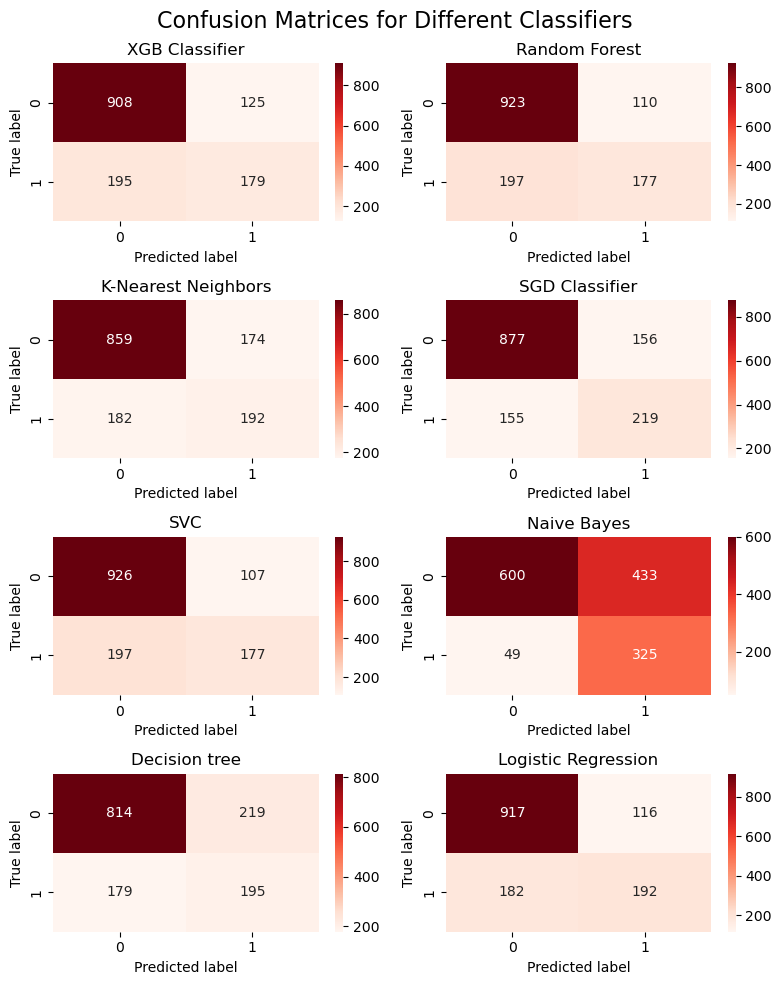

In [759]:
# Replace the dictionary with your actual confusion matrices
confusion_matrices = {
    'XGB Classifier': np.array([[908, 125], [195, 179]]),
    'Random Forest': np.array([[923, 110], [197, 177]]),
    'K-Nearest Neighbors': np.array([[859, 174], [182, 192]]),
    'SGD Classifier': np.array([[877, 156], [155, 219]]),
    'SVC': np.array([[926, 107], [197, 177]]),
    'Naive Bayes': np.array([[600, 433], [49, 325]]),
    'Decision tree': np.array([[814, 219], [179, 195]]),
    'Logistic Regression': np.array([[917, 116], [182, 192]])
}

# Create subplots for each confusion matrix
fig, axes = plt.subplots(4, 2, figsize=(8, 10))
fig.suptitle('Confusion Matrices for Different Classifiers', fontsize=16)

# Flatten the axes for easy iteration
axes = axes.ravel()

for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=axes[i])
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Predicted label')
    axes[i].set_ylabel('True label')

plt.tight_layout()
plt.show()

### Analysis of the trained model using the data from the confusion matrices above:

1. **XGB Classifier**:
   - True Positives (TP): 179
   - True Negatives (TN): 908
   - False Positives (FP): 125
   - False Negatives (FN): 195

2. **Random Forest**:
   - True Positives (TP): 177
   - True Negatives (TN): 923
   - False Positives (FP): 110
   - False Negatives (FN): 197

3. **K-Nearest Neighbors**:
   - True Positives (TP): 192
   - True Negatives (TN): 859
   - False Positives (FP): 174
   - False Negatives (FN): 182

4. **SGD Classifier**:
   - True Positives (TP): 219
   - True Negatives (TN): 877
   - False Positives (FP): 156
   - False Negatives (FN): 155

5. **SVC**:
   - True Positives (TP): 177
   - True Negatives (TN): 926
   - False Positives (FP): 107
   - False Negatives (FN): 197

6. **Naive Bayes**:
   - True Positives (TP): 325
   - True Negatives (TN): 600
   - False Positives (FP): 433
   - False Negatives (FN): 49

7. **Decision Tree**:
   - True Positives (TP): 195
   - True Negatives (TN): 814
   - False Positives (FP): 219
   - False Negatives (FN): 179

8. **Logistic Regression**:
   - True Positives (TP): 192
   - True Negatives (TN): 917
   - False Positives (FP): 116
   - False Negatives (FN): 182

Given that our objective is to identify the accurate number of users likely to churn, it is advisable to prioritize a model with a higher recall rate, which captures more positive instances. In this context, I recommend opting for the Naive Bayes model, as it exhibits the highest recall rate compared to the other models, standing at 86.9%.



## As a data analyst trying to predict the accurate churn rate of ConnecTel and implement targeted retention initiatives, the most important metrics for the problem are precision, recall, and ROC-AUC score. These metrics will help the company understand the effectiveness of their churn prediction model and its ability to differentiate between churned and non-churned customers.

1. **Precision**: Precision is the proportion of true positive predictions (churned customers correctly identified) among all positive predictions made by the model. High precision indicates that when the model predicts a customer will churn, it is highly likely to be correct. For the company, higher precision means that the targeted retention initiatives will be more accurate and cost-effective, as they will be directed towards customers who are genuinely at risk of churn.

2. **Recall (Sensitivity)**: Recall is the proportion of true positive predictions among all actual positive instances in the dataset. High recall indicates that the model is effective at capturing most of the churned customers in the dataset. For the company, higher recall means that the churn prediction model can identify a larger portion of customers who are likely to churn. This is crucial for implementing effective targeted retention initiatives and reducing customer churn.

3. **ROC-AUC Score**: The Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score measures the model's ability to distinguish between churned and non-churned customers. A higher ROC-AUC score indicates better discrimination power of the model. For the company, a higher ROC-AUC score means that the churn prediction model can effectively rank customers based on their likelihood of churn, enabling more accurate prioritization of retention efforts.

Considering the business objectives of accurate forecasting and targeted retention initiatives:

- The business should be concerned with both false negatives and true positives. False negatives represent customers who are at risk of churn but are not identified by the model. If the model has high false negatives, the company may miss out on opportunities to retain these customers, resulting in higher churn rates.

- At the same time, the company should strive for higher true positives (correctly identified churned customers) to effectively implement targeted retention initiatives. By identifying more true positives, the company can direct resources towards those customers who are most likely to churn, leading to more successful retention strategies.

In summary, precision, recall, and ROC-AUC score are all critical metrics for the company's churn prediction model. The company should aim to strike a balance between precision and recall, depending on the costs associated with false negatives and false positives. Achieving high precision and recall, along with a strong ROC-AUC score, will support the company in making informed decisions and implementing successful customer retention strategies.